# 🎬 Análisis Exploratorio de Datos (EDA) del Dataset de Películas

En este notebook realizamos el EDA (Análisis Exploratorio de Datos) sobre el dataset
ya limpiado y transformado en fases anteriores del proyecto.

El objetivo es:

- Comprender la distribución de las variables.
- Explorar relaciones entre columnas.
- Identificar patrones generales.
- Comparar grupos (géneros, tipo de película, color…).
- Visualizar tendencias temporales.
- Detectar outliers y sesgos.
- Realizar gráficos tanto básicos como avanzados.


In [52]:
import pandas as pd
import importlib
import sys

# Añadimos la ruta a /src para poder importar módulos locales
sys.path.append("../src")

# Importamos módulos locales
import cleaning
import visualizaciones

# Recargamos para asegurarnos de tener las versiones actualizadas
importlib.reload(cleaning)
importlib.reload(visualizaciones)

# Importamos las funciones que necesitamos
from cleaning import clean_data
from visualizaciones import (
    run_basic_visualizations,
    run_intermediate_visualizations,
    run_advanced_visualizations,
    run_objetivo_visualizations
)


In [53]:
df_raw = pd.read_csv("../data/movie_metadata.csv")
df_raw.head()




,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [54]:
df_clean = clean_data(df_raw)
df_clean.head()




,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,main_genre,movie_type
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,Usa,PG-13,237000000.0,2009,936.0,7.9,1.78,33000,Action,Pelicula_Larga
26,Color,James Cameron,315.0,194.0,0.0,794.0,Kate Winslet,29000.0,658672302.0,Drama|Romance,...,Usa,PG-13,200000000.0,1997,14000.0,7.7,2.35,26000,Drama,Pelicula_Larga
29,Color,Colin Trevorrow,644.0,124.0,365.0,1000.0,Judy Greer,3000.0,652177271.0,Action|Adventure|Sci-Fi|Thriller,...,Usa,PG-13,150000000.0,2015,2000.0,7.0,2.00,150000,Action,Pelicula_Larga
17,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi,...,Usa,PG-13,220000000.0,2012,21000.0,8.1,1.85,123000,Action,Pelicula_Larga
66,Color,Christopher Nolan,645.0,152.0,22000.0,11000.0,Heath Ledger,23000.0,533316061.0,Action|Crime|Drama|Thriller,...,Usa,PG-13,185000000.0,2008,13000.0,9.0,2.35,37000,Action,Pelicula_Larga


## ✔️ Dataset limpio y preparado

El dataset ya está:

- Normalizado en nombres y formatos
- Con las categóricas homogeneizadas
- Con valores nulos tratados
- Tipos corregidos (numéricos, fechas, categóricos)
- País y lenguaje imputados por moda
- Columnas nuevas creadas:
  - `main_genre`
  - `movie_type`
- Datos ordenados por recaudación (`gross`) de mayor a menor

A partir de aquí podemos realizar el análisis exploratorio.



In [55]:
df_clean.info()


<class 'pandas.core.frame.DataFrame'>
Index: 4997 entries, 0 to 5040
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   color                      4997 non-null   category
 1   director_name              4997 non-null   object  
 2   num_critic_for_reviews     4948 non-null   float64 
 3   duration                   4982 non-null   float64 
 4   director_facebook_likes    4894 non-null   float64 
 5   actor_3_facebook_likes     4974 non-null   float64 
 6   actor_2_name               4997 non-null   object  
 7   actor_1_facebook_likes     4990 non-null   float64 
 8   gross                      4124 non-null   float64 
 9   genres                     4997 non-null   object  
 10  actor_1_name               4997 non-null   object  
 11  movie_title                4997 non-null   object  
 12  num_voted_users            4997 non-null   int64   
 13  cast_total_facebook_likes  4997 non-nu

In [56]:
df_clean.describe(include="all")


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,main_genre,movie_type
count,4997,4997,4948.000000,4982.000000,4894.000000,4974.000000,4997,4990.000000,4.124000e+03,4997,...,4997,4997,4.510000e+03,4890.0,4984.000000,4997.000000,4670.000000,4997.000000,4997,4997
unique,3,2398,NaN,NaN,NaN,NaN,3032,NaN,NaN,914,...,66,17,NaN,<NA>,NaN,NaN,NaN,NaN,21,4
top,Color,Nan,NaN,NaN,NaN,NaN,Morgan Freeman,NaN,NaN,Drama,...,Usa,R,NaN,<NA>,NaN,NaN,NaN,NaN,Comedy,Pelicula
freq,4772,103,NaN,NaN,NaN,NaN,20,NaN,NaN,235,...,3772,2098,NaN,<NA>,NaN,NaN,NaN,NaN,1320,3839
mean,NaN,NaN,139.904406,107.210157,688.778096,640.027744,NaN,6558.166533,4.832565e+07,NaN,...,NaN,NaN,3.975660e+07,2002.486503,1643.324037,6.440744,2.221608,7488.790274,NaN,NaN
std,NaN,NaN,121.485682,25.250319,2821.929428,1643.439139,NaN,15062.846777,6.796483e+07,NaN,...,NaN,NaN,2.069910e+08,12.415059,4031.264334,1.124003,1.391273,19292.417417,NaN,NaN
min,NaN,NaN,1.000000,7.000000,0.000000,0.000000,NaN,0.000000,1.620000e+02,NaN,...,NaN,NaN,2.180000e+02,1920.0,0.000000,1.600000,1.180000,0.000000,NaN,NaN
25%,NaN,NaN,50.000000,93.000000,7.000000,133.000000,NaN,612.250000,5.304835e+06,NaN,...,NaN,NaN,6.000000e+06,1999.0,280.000000,5.800000,1.850000,0.000000,NaN,NaN
50%,NaN,NaN,110.000000,103.000000,49.000000,369.500000,NaN,984.500000,2.544575e+07,NaN,...,NaN,NaN,2.000000e+07,2005.0,595.000000,6.600000,2.350000,162.000000,NaN,NaN
75%,NaN,NaN,195.000000,118.000000,192.000000,635.000000,NaN,11000.000000,6.231942e+07,NaN,...,NaN,NaN,4.500000e+07,2011.0,917.250000,7.200000,2.350000,3000.000000,NaN,NaN


## 📊 Estructura general del dataset limpio

A partir de la inspección con `info()` y `describe()` observamos:

- El dataset contiene 4997 películas tras la limpieza.
- Tenemos categorías normalizadas (`main_genre`, `color`, `movie_type`…).
- Variables numéricas como `gross`, `budget`, `duration`, `imdb_score` están listas para análisis.
- Se han corregido tipos (categóricas → category, años → int, numéricas → float).
- El ordenamiento por `gross` permite gráficos directos de *Top películas*.

Ahora comenzamos el análisis visual.


📊 Histogramas esenciales...


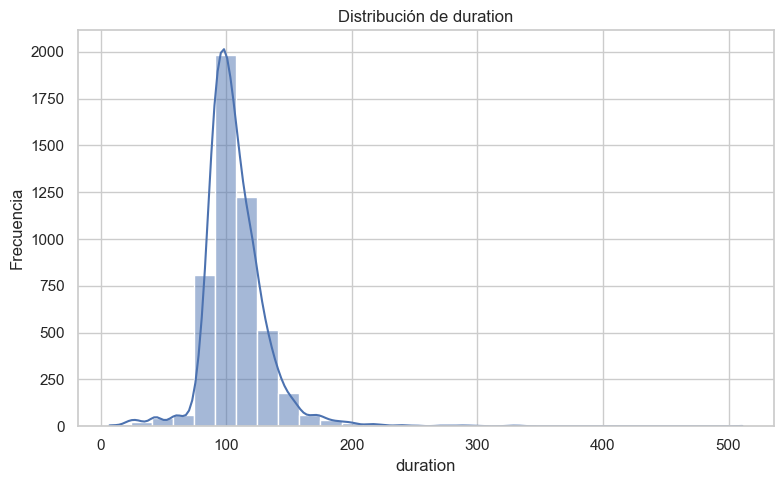

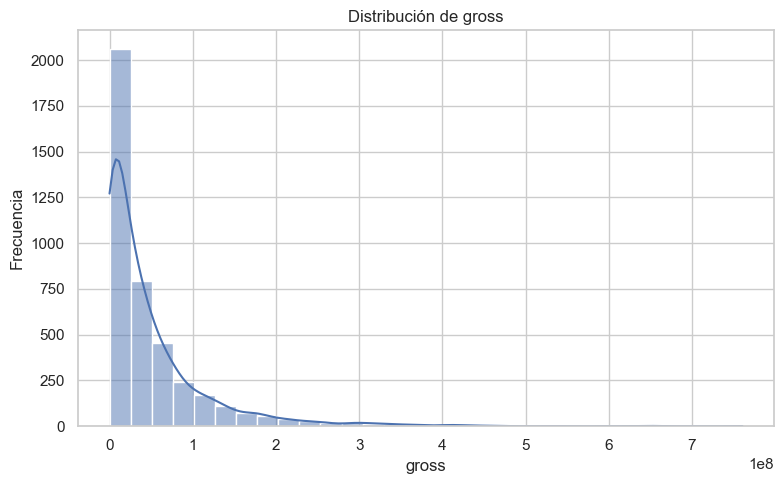

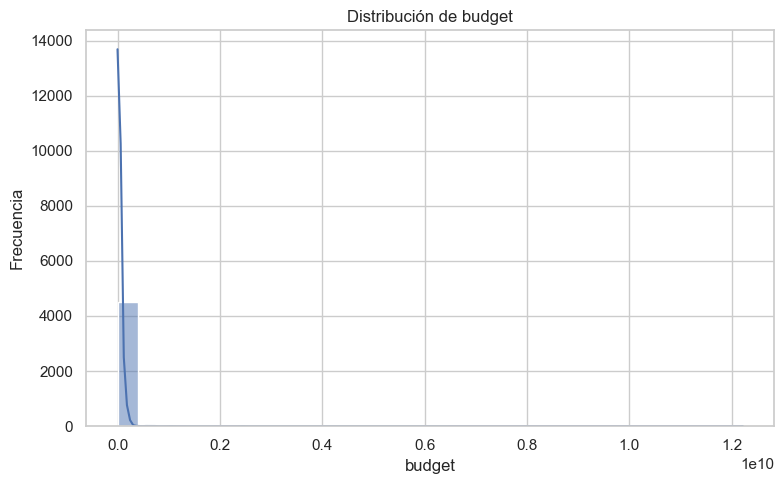

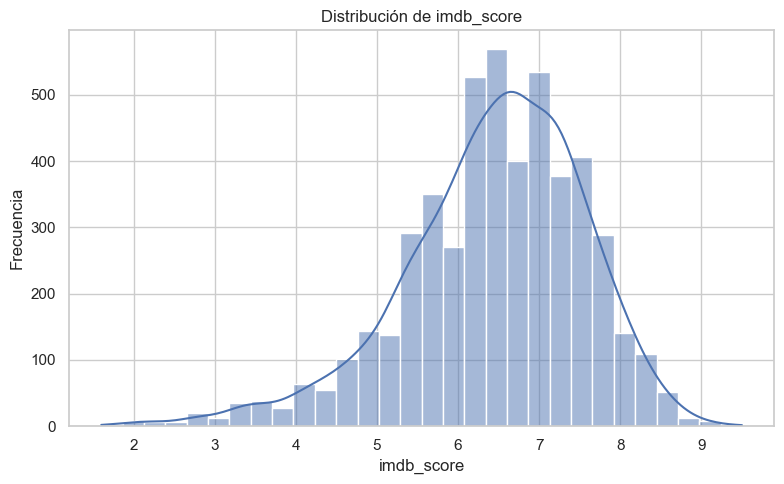

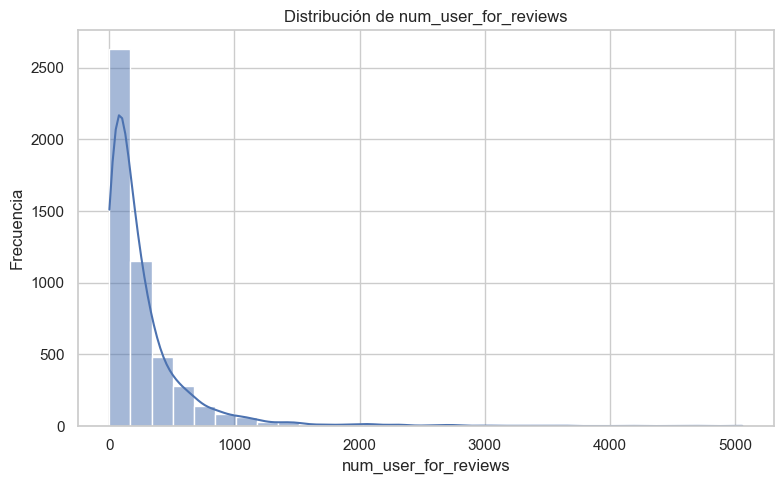

📊 Barras esenciales...


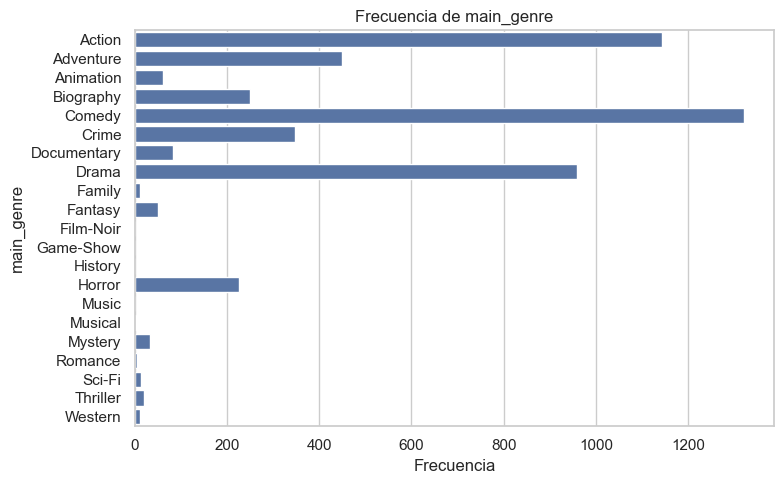

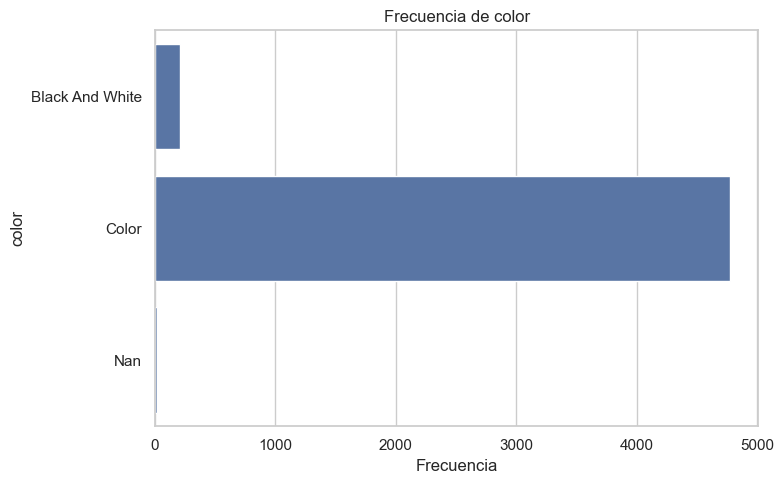

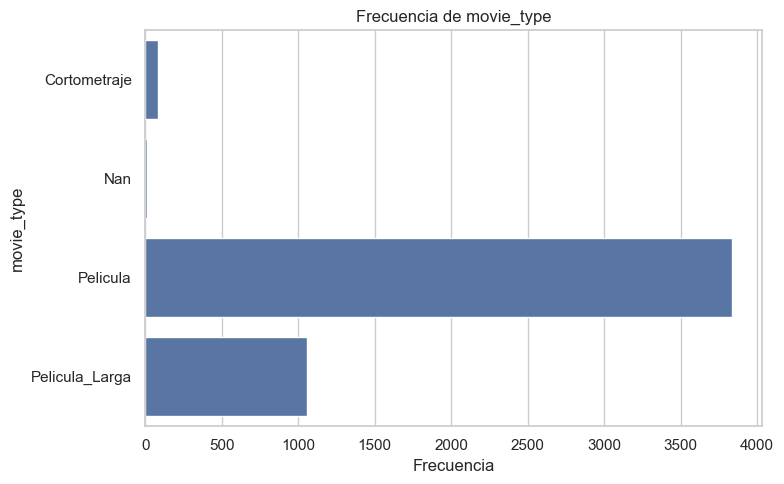

📊 Boxplots esenciales...


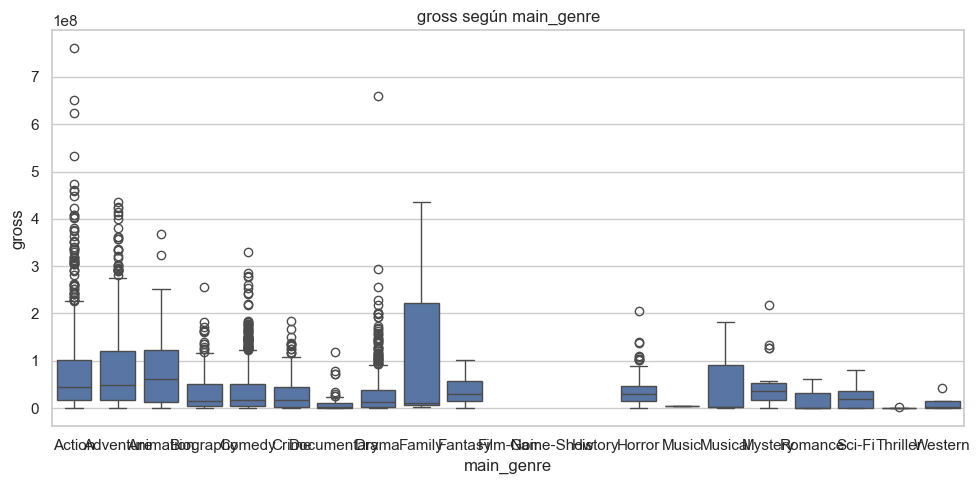

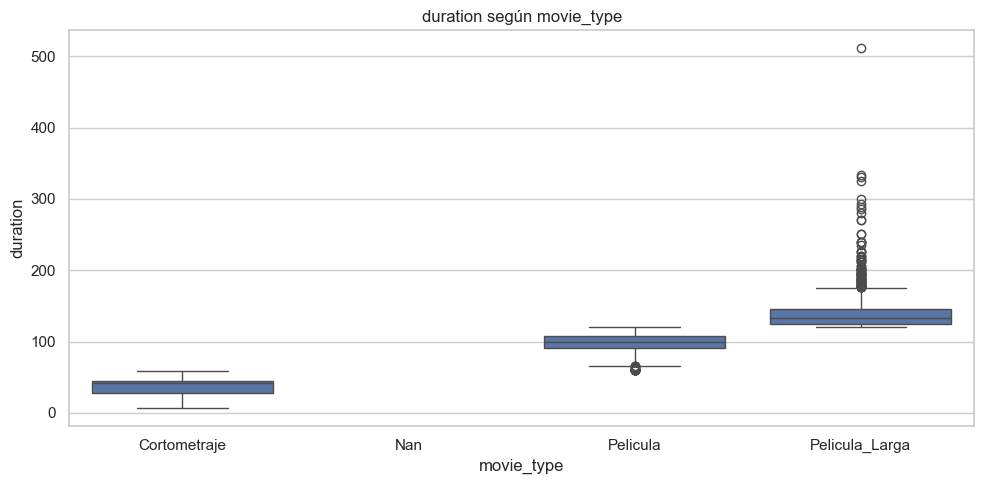

✅ Tanda 1 completada.


In [57]:
run_basic_visualizations(df_clean)


Distribución de duration

La mayoría de películas tienen una duración concentrada alrededor de 90–120 minutos, con una distribución ligeramente asimétrica hacia la derecha. Existen valores atípicos con duraciones extremadamente largas, aunque son casos puntuales.

Distribución de gross (recaudación)

La recaudación muestra una fuerte asimetría positiva: muchas películas recaudan poco y solo unas pocas alcanzan cifras muy altas. Esto indica una gran desigualdad en ingresos dentro de la industria.

Distribución de budget (presupuesto)

El presupuesto también está muy sesgado hacia la derecha, con muchos valores bajos y pocos extremadamente altos. La escala amplia indica presencia de grandes producciones con presupuestos muy elevados.

Distribución de imdb_score

Los valores siguen una forma casi normal centrada entre 6 y 7 puntos, lo que sugiere que la mayoría de películas reciben valoraciones moderadamente positivas.

Distribución de num_user_for_reviews

La mayoría de films acumulan pocas reseñas de usuarios, mientras que un grupo reducido recibe miles. Refuerza la idea de que solo unas pocas producciones concentran la atención.

Frecuencia de main_genre

Los géneros más frecuentes son Comedy, Action, Drama y Adventure, lo que refleja la predominancia de contenido comercial y generalista. Géneros como Film-Noir, Musical o Western son minoritarios.

Frecuencia de color

La gran mayoría de películas son en color. El blanco y negro representa una proporción mínima, como es esperable en cine moderno.

Frecuencia de movie_type

La categoría dominante es Película, seguida de Película_Larga. Los cortometrajes aparecen en menor cantidad, lo que es coherente con el enfoque del dataset en largometrajes comerciales.

Recaudación según main_genre

Los géneros como Action, Adventure, Family y Fantasy muestran las recaudaciones más altas, mientras que formatos como Documentary, Film-Noir o Western presentan cifras mucho menores.

Duración según movie_type

Los Cortometrajes muestran duraciones muy bajas y homogéneas. Las Películas se sitúan alrededor de 100 minutos y las Películas_Largas superan ese valor con mayor variabilidad. La clasificación creada funciona correctamente.


📍 Scatterplots...


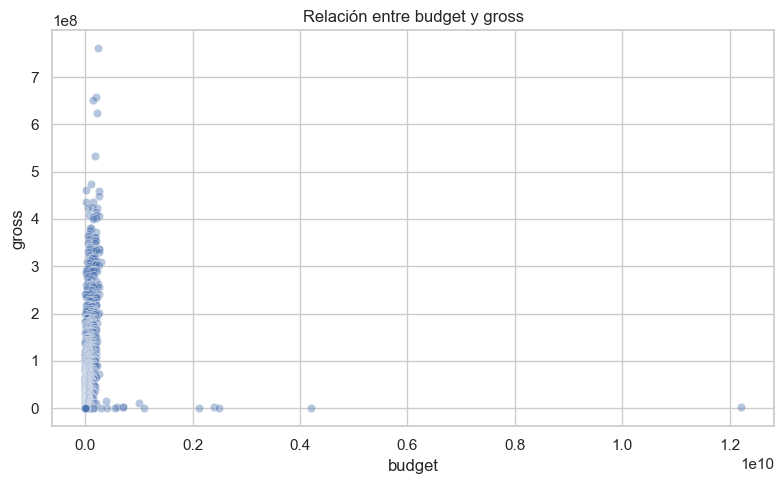

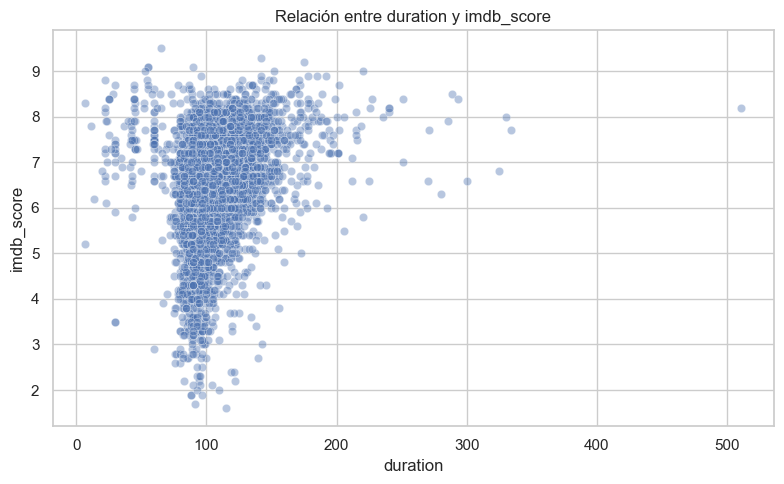

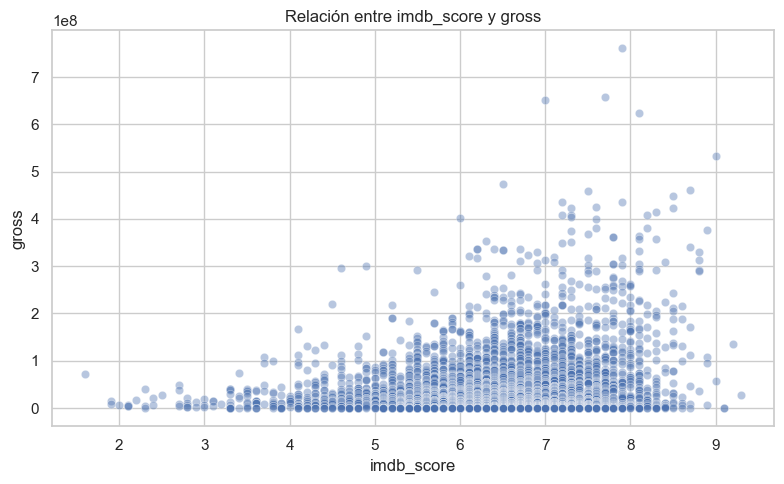

📍 Gráficos de medias por categoría...


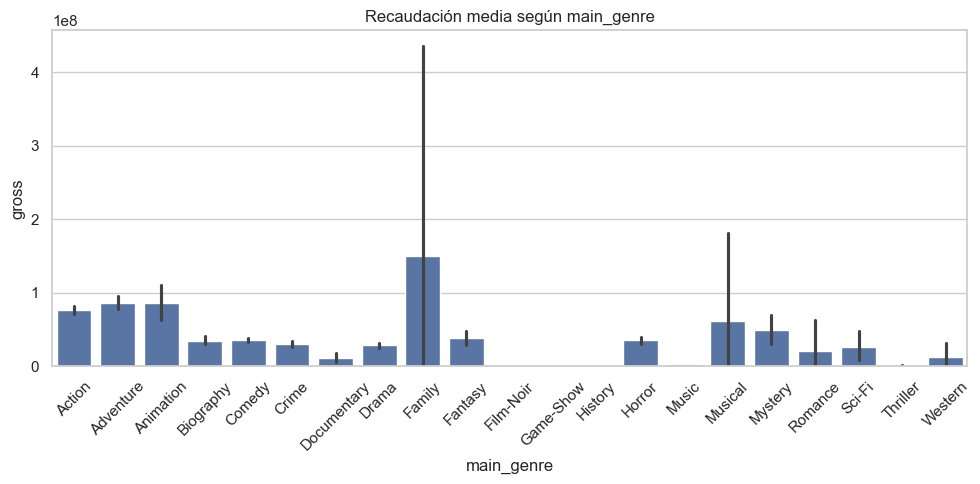

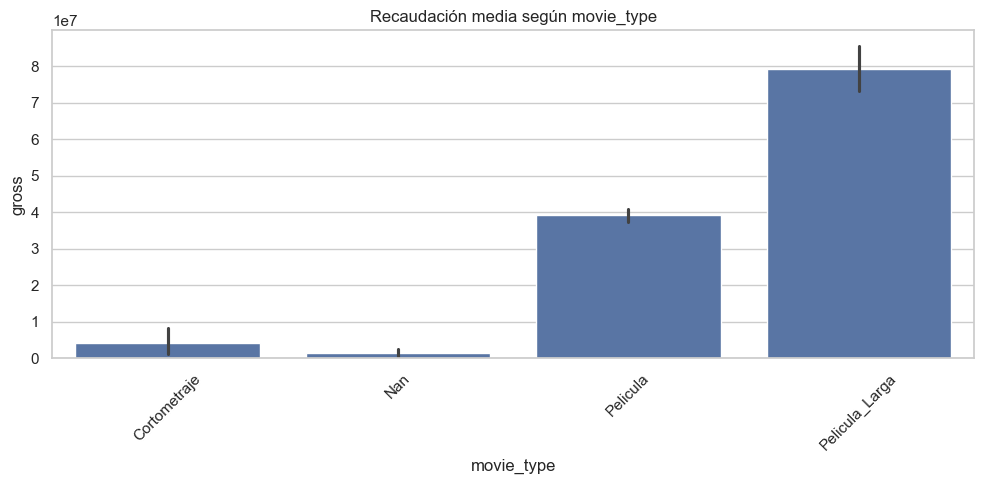

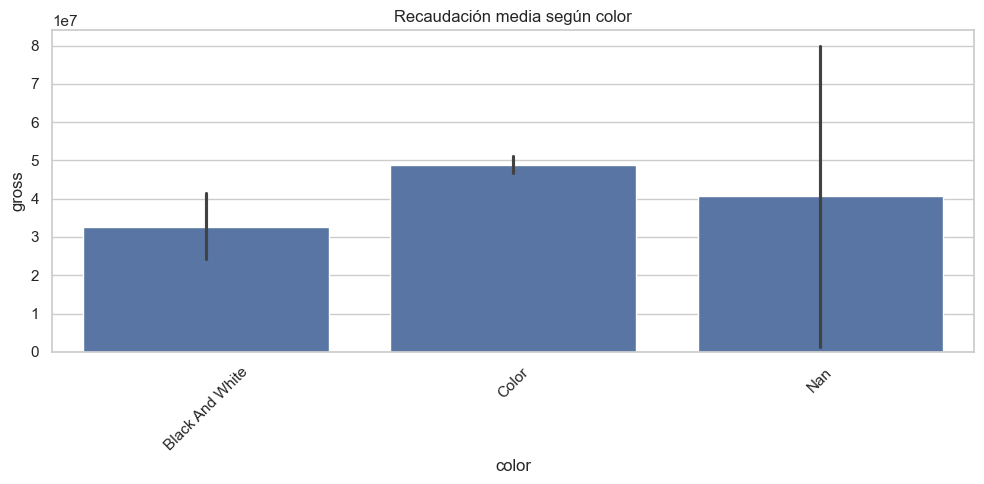

📍 Mapa de correlaciones...


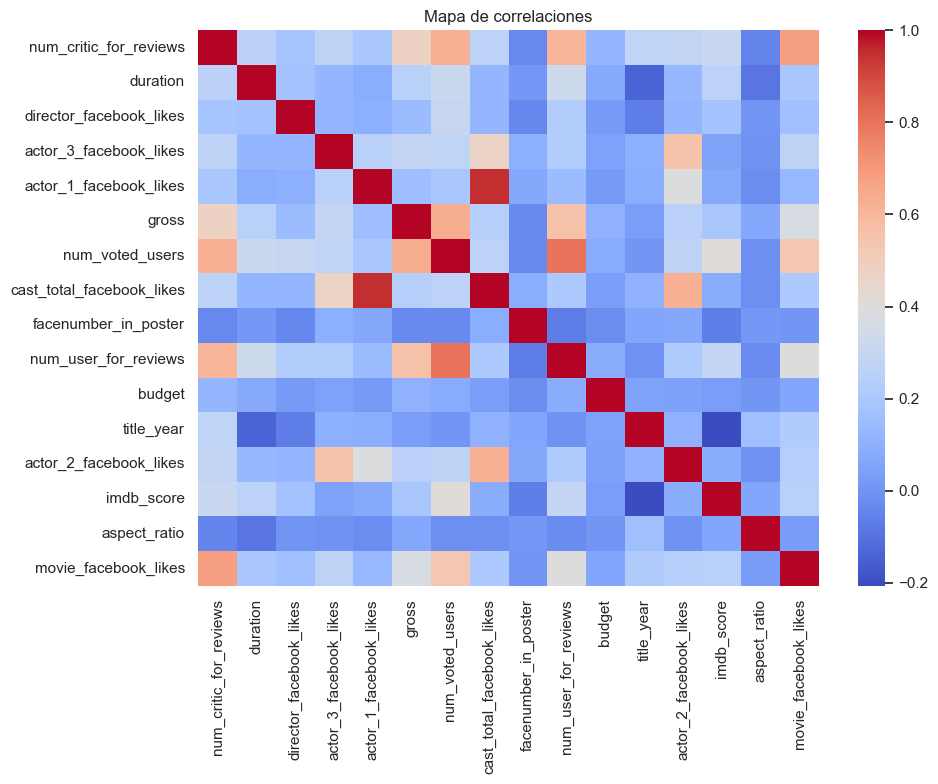

✅ Tanda 2 completada.


In [58]:
run_intermediate_visualizations(df_clean)


Relación entre budget y gross

La nube de puntos muestra que, en general, un mayor presupuesto tiende a asociarse con una mayor recaudación, aunque la relación no es estricta. Hay muchos casos con presupuestos altos y recaudaciones moderadas, lo que sugiere que invertir más no garantiza éxito, pero sí aumenta la probabilidad de obtener mayores ingresos.

🔹 Relación entre duration e imdb_score

Se observa una ligera tendencia donde las películas de entre 80 y 140 minutos tienden a concentrar la mayor parte de las mejores valoraciones. No parece haber una relación fuerte, pero sí que las duraciones extremas (muy cortas o muy largas) suelen tener calificaciones más bajas o inconsistentes.

🔹 Relación entre imdb_score y gross

Existe una tendencia ascendente: las películas con mejores valoraciones en IMDb suelen recaudar más. Aunque la dispersión es amplia, especialmente para valores altos, se aprecia que las películas mejor valoradas tienen más probabilidad de ser éxitos comerciales.

🔹 Recaudación media según main_genre

Los géneros Family, Adventure y Animation presentan las recaudaciones medias más altas, lo que indica que tienden a tener mayor atractivo para el público global. Otros géneros como Documentary o Film-Noir muestran medias bajas, probablemente por tener audiencias más nicho.

🔹 Recaudación media según movie_type

Las películas largas superan ampliamente en recaudación a las películas estándar y cortometrajes. Los cortometrajes presentan ingresos mucho menores, lo que es coherente con su naturaleza más independiente y menor distribución comercial.

🔹 Recaudación media según color

Las películas en color recaudan más que las películas en blanco y negro. Esto refleja tendencias históricas y tecnológicas de la industria: la gran mayoría de producciones modernas son en color y tienen mayores presupuestos y distribución.

🔹 Mapa de correlaciones

El heatmap revela correlaciones positivas moderadas entre:

budget y gross

num_voted_users y imdb_score

actor/director Facebook likes y num_user_for_reviews

La correlación entre presupuesto y recaudación es clara, mientras que otras relaciones son más débiles, evidenciando que la recaudación depende de múltiples factores, no solo del presupuesto o popularidad del elenco.



🔬 Pairplot avanzado…


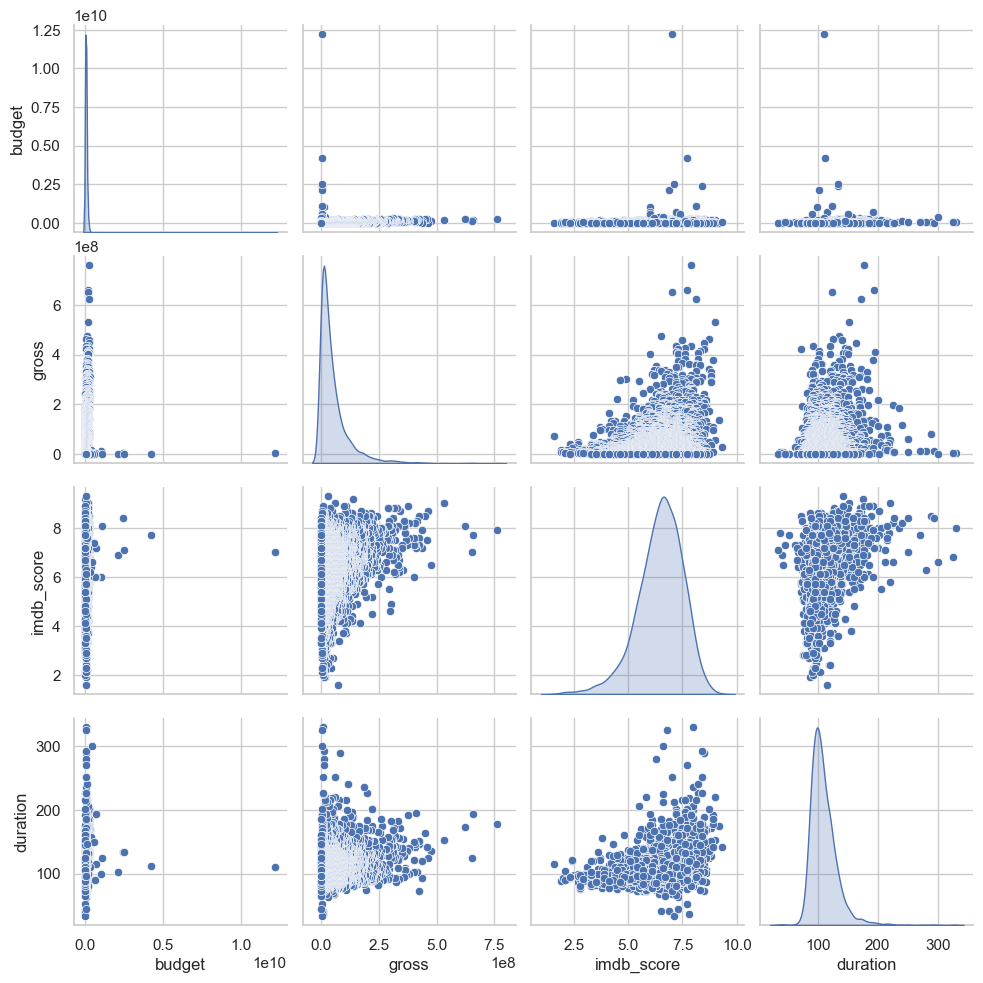

🔬 Violinplots avanzados…


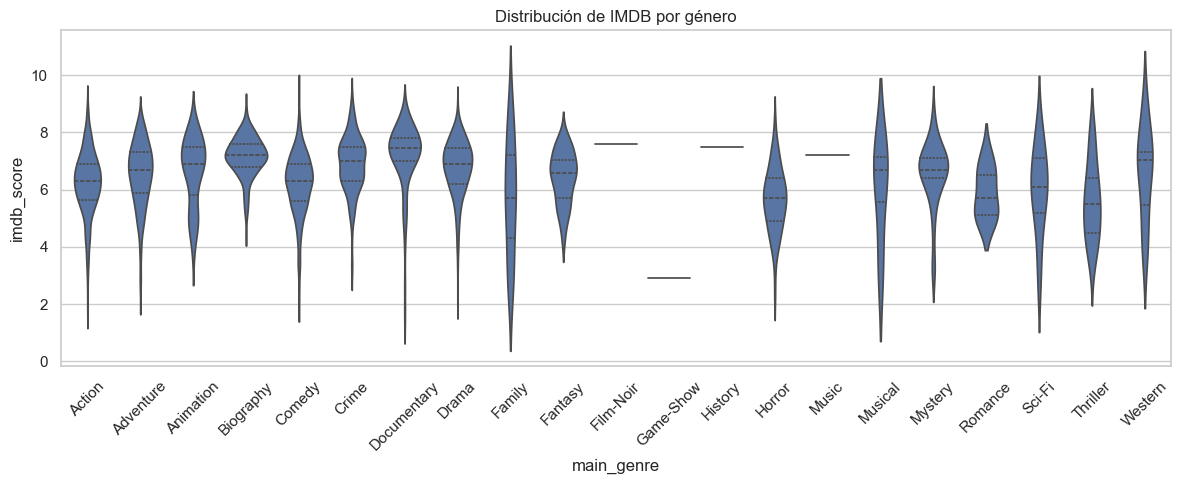

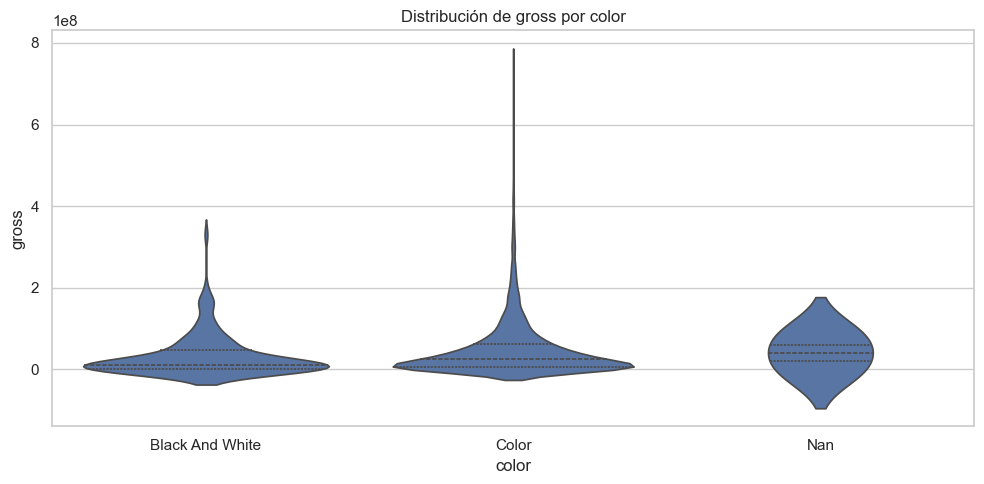

🔬 Distribuciones logarítmicas…


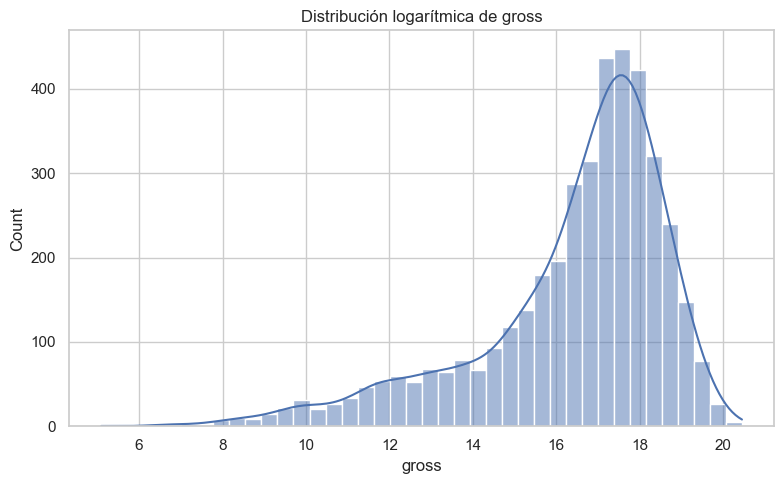

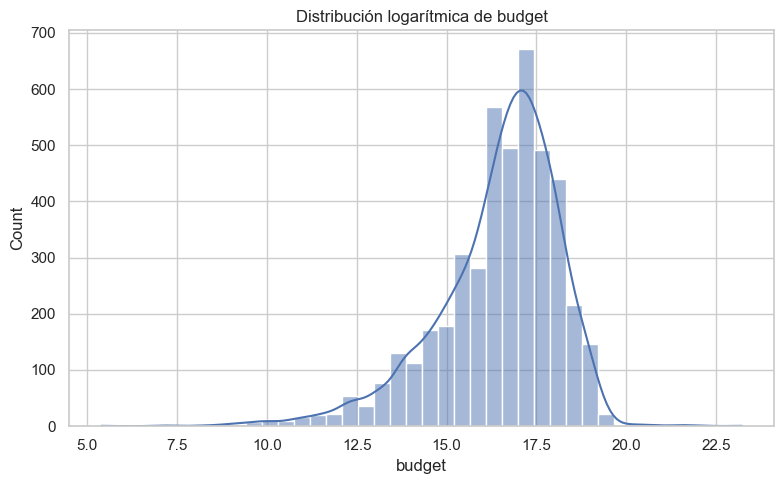

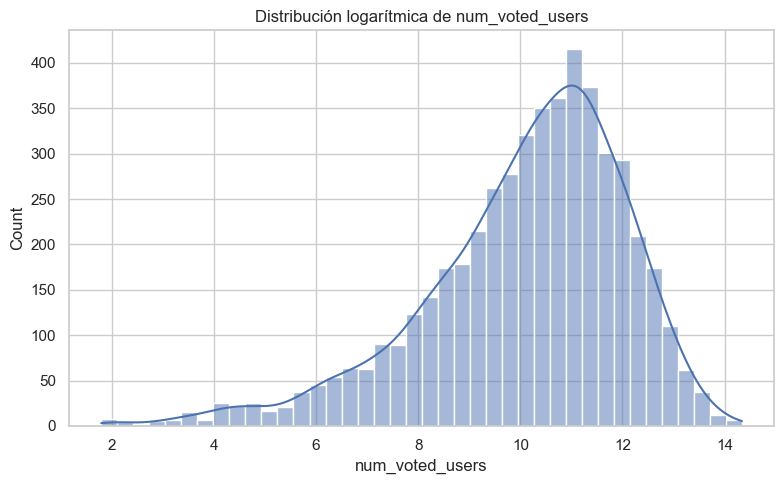

✅ Tanda 3 completada.


In [59]:
run_advanced_visualizations(df_clean)




**Pairplot avanzado**
El pairplot confirma varias relaciones clave del dataset:  
- *budget* y *gross* muestran una correlación positiva clara, aunque influida por valores extremos.  
- *imdb_score* se asocia ligeramente con *duration* y, en menor medida, con *gross*, indicando que películas mejor valoradas tienden a obtener algo más de recaudación.  
- Las distribuciones univariadas de *gross*, *budget* y *num_voted_users* confirman colas largas y la presencia de outliers.

**Distribución de IMDB por género (violinplot)**
- Las valoraciones IMDB son relativamente consistentes entre géneros.  
- Drama, Biography y Documentary suelen presentar medias más altas.  
- Family, Action y Horror tienen mayor variabilidad interna.  
- No se observan géneros con valoraciones claramente bajas o claramente altas de forma generalizada.

**Distribución de recaudación según color (violinplot)**
- Las películas en color presentan mayor dispersión y recaudaciones potencialmente más altas.  
- Las producciones en blanco y negro muestran menor variabilidad, lo que es esperable por antigüedad y menor inversión presupuestaria.  
- Los valores NaN (ya tratados) quedan con alta variabilidad al agrupar datos heterogéneos.

**Distribución logarítmica de gross**
- Tras aplicar logaritmo, la distribución se vuelve más cercana a una forma normal, lo que confirma que la recaudación original está altamente sesgada.  
- Esto sugiere que muchas películas recaudan poco y unas pocas obtienen cifras extremadamente altas.

**Distribución logarítmica de budget**
- Igual que con *gross*, la transformación log reduce el sesgo.  
- Muestra que el presupuesto sigue un patrón donde la mayoría de películas cuentan con presupuestos relativamente bajos y un grupo reducido con inversiones muy altas.

**Distribución logarítmica de num_voted_users**
- La transformación log permite visualizar mejor la distribución.  
- La mayoría de películas acumulan un número moderado de votos, mientras que unas pocas concentran un volumen enorme de interacciones, lo cual concuerda con la recaudación y popularidad general.


➡ Recaudación por país


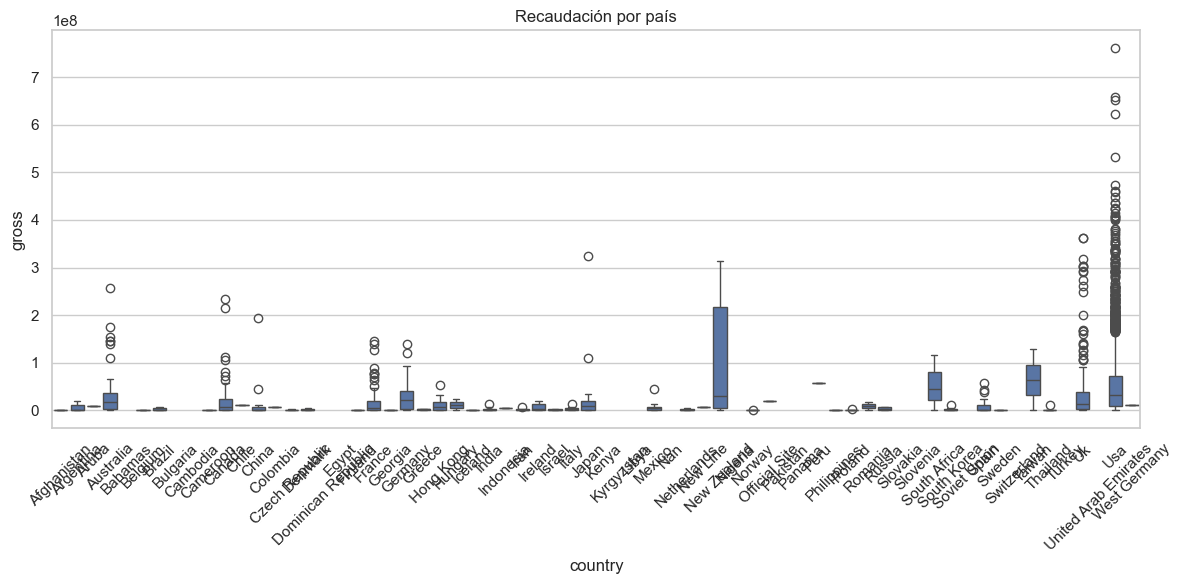

➡ Recaudación global por género


c:\Users\ALEJANDRO\Desktop\EVOLVE\eda-movie-dataset\notebooks\../src\visualizaciones.py:296: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("main_genre")["gross"]


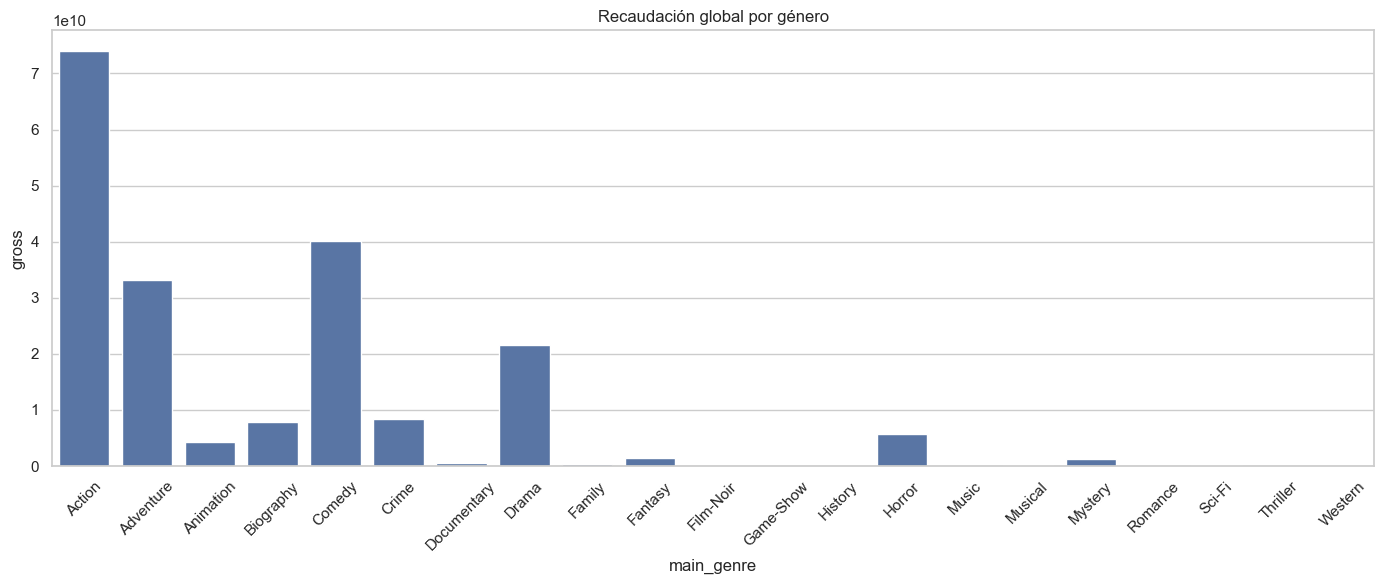

➡ Recaudación por clasificación según país


c:\Users\ALEJANDRO\Desktop\EVOLVE\eda-movie-dataset\notebooks\../src\visualizaciones.py:328: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


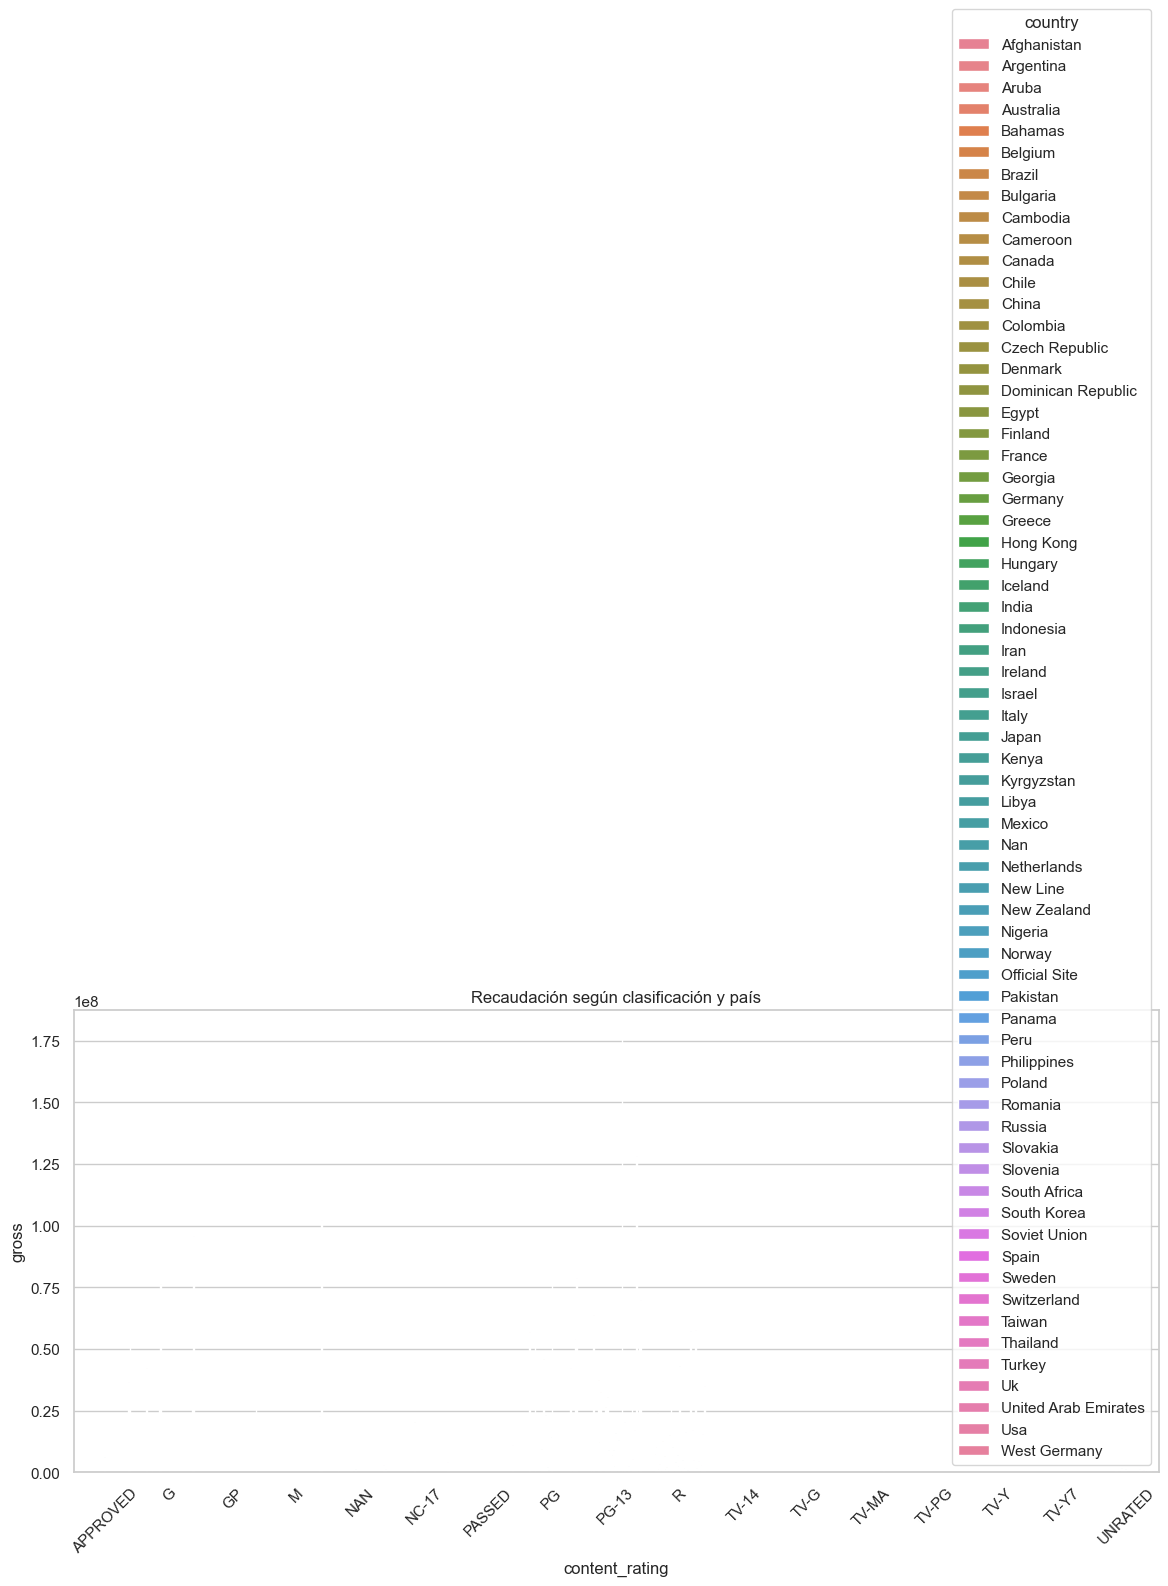

➡ Interacción país × género × clasificación × recaudación


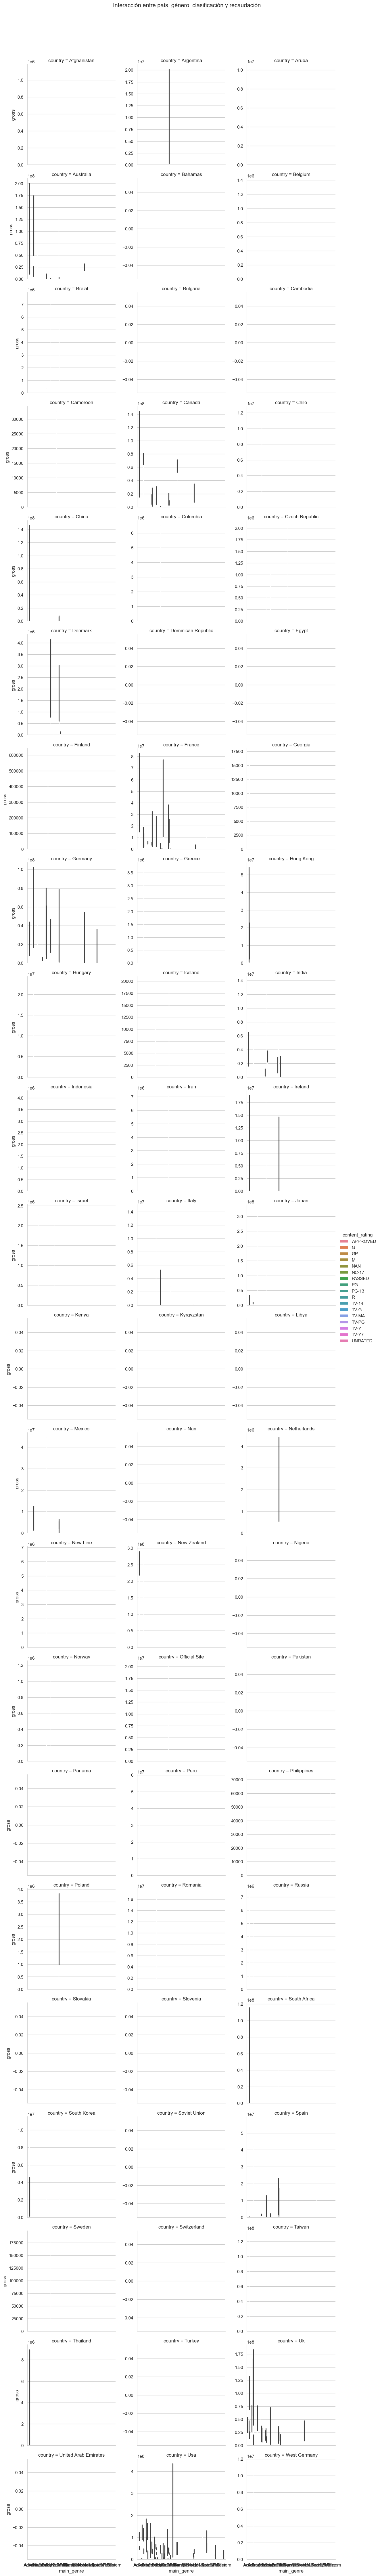

✔ Visualizaciones orientadas al objetivo completadas.


In [62]:


run_objetivo_visualizations(df_clean, save=False)



**Conclusiones sobre el objetivo del estudio**

Tras analizar la relación entre país, género principal y clasificación de edades con la recaudación (gross), se observan los siguientes patrones relevantes:

1. Diferencias claras de recaudación entre países

Los gráficos muestran que:

Estados Unidos supera ampliamente al resto en volumen de recaudación, tanto por número de películas como por magnitud económica.

Países como Reino Unido, Francia, Australia o Canadá muestran recaudaciones moderadas pero estables.

La mayoría de países restantes presentan recaudaciones muy bajas y distribuciones más dispersas.

Conclusión: La recaudación está fuertemente condicionada por el país, especialmente debido al tamaño del mercado cinematográfico estadounidense.

2. El género influye notablemente en la recaudación

Del gráfico de recaudación global por género se aprecia que:

Action, Comedy, Adventure y Drama concentran la mayor recaudación total.

Géneros como Film-Noir, Game-Show, History, Music, Western o Documentary generan una recaudación significativamente menor.

Conclusión: Los géneros comerciales (acción, comedia, aventura) dominan la recaudación global, y este patrón se mantiene independientemente del país.

3. Interacción entre clasificación por edades y país

El scatter por clasificación y país muestra que:

Las clasificaciones más frecuentes y con mayor recaudación son PG-13, R y PG.

La mayoría de estas películas proceden nuevamente de Estados Unidos, lo cual sesga fuertemente la escala del gráfico.

En países fuera de EE.UU. predominan menos categorías y las recaudaciones son más bajas, dificultando observar patrones claros.

Conclusión: La clasificación por edades sí influye en la recaudación, con ventaja para PG-13 y R, pero esta relación está muy condicionada por el dominio de Estados Unidos.

4. Interacción país – género – recaudación

De los gráficos por país y género se observa que:

En Estados Unidos, casi todos los géneros alcanzan valores altos de recaudación, especialmente Action, Adventure, Comedy y Drama.

En otros países, aunque los géneros más rentables siguen siendo similares, el volumen es muy inferior.

Hay géneros prácticamente inexistentes fuera de algunos mercados (p.ej., Animation o Fantasy concentrados en países concretos).

Conclusión: Aunque el género influye en la recaudación, su impacto varía mucho entre países, y parece amplificado en mercados grandes.

**Conclusión global del objetivo**

Los resultados indican que:

El país es la variable con mayor impacto en la recaudación, principalmente por el dominio del mercado estadounidense.

El género también influye, favoreciendo especialmente acción, comedia y aventura, independientemente del país.

La clasificación por edades afecta a la recaudación, siendo PG-13 y R las más rentables, aunque este patrón está asociado al volumen de películas producidas en EE.UU.

En conjunto, sí existe una relación entre país, género y clasificación por edades con la recaudación, pero el país es el factor predominante, y los otros dos actúan como moduladores dentro de cada industria nacional.